In [2]:
text = ['''The Ants and the Grasshopper 


  THE ANTS were spending a fine winter's day drying grain collected
in the summertime.  A Grasshopper, perishing with famine, passed
by and earnestly begged for a little food.  The Ants inquired of
him, "Why did you not treasure up food during the summer?'  He
replied, "I had not leisure enough.  I passed the days in
singing."  They then said in derision:  "If you were foolish enough
to sing all the summer, you must dance supperless to bed in the
winter."


    It is thrifty to prepare today for the wants of tomorrow''',
   
    '''The Cat and the Mice 

  A CERTAIN HOUSE was overrun with Mice.  A Cat, discovering this,
made her way into it and began to catch and eat them one by one. 
Fearing for their lives, the Mice kept themselves close in their
holes.  The Cat was no longer able to get at them and perceived
that she must tempt them forth by some device.  For this purpose
she jumped upon a peg, and suspending herself from it, pretended
to be dead.  One of the Mice, peeping stealthily out, saw her and
said, "Ah, my good madam, even though you should turn into a
meal-bag, we will not come near you."


        He who is once deceived is doubly cautious''', 
        
        '''The Goose With the Golden Eggs


  One day a countryman going to the nest of his Goose found
there an egg all yellow and glittering.  When he took it up it was
as heavy as lead and he was going to throw it away, because he
thought a trick had been played upon him.  But he took it home on
second thoughts, and soon found to his delight that it was an egg
of pure gold.  Every morning the same thing occurred, and he soon
became rich by selling his eggs.  As he grew rich he grew greedy;
and thinking to get at once all the gold the Goose could give, he
killed it and opened it only to find nothing.


    Greed oft o'er reaches itself.''', 
    
    '''The Hare and the Tortoise 


  A HARE one day ridiculed the short feet and slow pace of the
Tortoise, who replied, laughing:  "Though you be swift as the
wind, I will beat you in a race."  The Hare, believing her
assertion to be simply impossible, assented to the proposal; and
they agreed that the Fox should choose the course and fix the
goal.  On the day appointed for the race the two started
together.  The Tortoise never for a moment stopped, but went on
with a slow but steady pace straight to the end of the course. 
The Hare, lying down by the wayside, fell fast asleep.  At last
waking up, and moving as fast as he could, he saw the Tortoise
had reached the goal, and was comfortably dozing after her
fatigue.  


    Slow but steady wins the race.  ''', 
    
      '''The Man and His Two Wives


  In the old days, when men were allowed to have many wives, a
middle-aged Man had one wife that was old and one that was young;
each loved him very much, and desired to see him like herself.
Now the Man's hair was turning grey, which the young Wife did not
like, as it made him look too old for her husband.  So every night
she used to comb his hair and pick out the white ones.  But the
elder Wife saw her husband growing grey with great pleasure, for
she did not like to be mistaken for his mother.  So every morning
she used to arrange his hair and pick out as many of the black
ones as she could.  The consequence was the Man soon found himself
entirely bald.


    Yield to all and you will soon have nothing to yield.''']

col_names = ['The Ants and the Grasshopper', 'The Cat and the Mice', 'The Goose With the Golden Eggs', 'The Hare and the Tortoise', 'The Man and His Two Wives']

In [3]:
import pandas as pd 

In [5]:
df_svd = pd.DataFrame(text)
df_svd['book'] = col_names
df_svd

0  \
0  The Ants and the Grasshopper \n\n\n  THE ANTS ...   
1  The Cat and the Mice \n\n  A CERTAIN HOUSE was...   
2  The Goose With the Golden Eggs\n\n\n  One day ...   
3  The Hare and the Tortoise \n\n\n  A HARE one d...   
4  The Man and His Two Wives\n\n\n  In the old da...   

                             book  
0    The Ants and the Grasshopper  
1            The Cat and the Mice  
2  The Goose With the Golden Eggs  
3       The Hare and the Tortoise  
4       The Man and His Two Wives

In [1]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialising
lemmatizer = WordNetLemmatizer()

stop_words = stopwords.words("english")

def datacleaning(mystring):
    # Step 1 
    # Tokenize the string
    try:
        my_tokenized_string = word_tokenize(mystring)
        
        # ----------------- End of step 1 ----------------- #
        
        temp = []
        for i in my_tokenized_string:
    #         print(f'i right now is ({i})')
            i = i.lower()
            if i in stop_words or not(i.isalpha()):
                pass
            else:
                # Appending a word that is not a stopword and lemmatizing the same at the same time
                temp.append(lemmatizer.lemmatize(i))
    
        my_new_string = ' '.join(temp)
        return my_new_string
    except:
        return ''

In [8]:
df_svd['clean_text'] = df_svd[0].apply(datacleaning)
df_svd

0  \
0  The Ants and the Grasshopper \n\n\n  THE ANTS ...   
1  The Cat and the Mice \n\n  A CERTAIN HOUSE was...   
2  The Goose With the Golden Eggs\n\n\n  One day ...   
3  The Hare and the Tortoise \n\n\n  A HARE one d...   
4  The Man and His Two Wives\n\n\n  In the old da...   

                             book  \
0    The Ants and the Grasshopper   
1            The Cat and the Mice   
2  The Goose With the Golden Eggs   
3       The Hare and the Tortoise   
4       The Man and His Two Wives   

                                          clean_text  
0  ant grasshopper ant spending fine winter day d...  
1  cat mouse certain house overrun mouse cat disc...  
2  goose golden egg one day countryman going nest...  
3  hare tortoise hare one day ridiculed short foo...  
4  man two wife old day men allowed many wife man...

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# We initialise it
my_vectorizer = CountVectorizer()

In [13]:
# Fit
my_vectorizer.fit(df_svd['clean_text'])

CountVectorizer()

In [12]:
df_svd['clean_text']

0    ant grasshopper ant spending fine winter day d...
1    cat mouse certain house overrun mouse cat disc...
2    goose golden egg one day countryman going nest...
3    hare tortoise hare one day ridiculed short foo...
4    man two wife old day men allowed many wife man...
Name: clean_text, dtype: object

In [14]:
my_vectorizer.get_feature_names_out()

array(['able', 'agreed', 'ah', 'allowed', 'ant', 'appointed', 'arrange',
       'asleep', 'assented', 'assertion', 'away', 'bald', 'beat',
       'became', 'bed', 'began', 'begged', 'believing', 'black', 'cat',
       'catch', 'cautious', 'certain', 'choose', 'close', 'collected',
       'comb', 'come', 'comfortably', 'consequence', 'could',
       'countryman', 'course', 'dance', 'day', 'dead', 'deceived',
       'delight', 'derision', 'desired', 'device', 'discovering',
       'doubly', 'dozing', 'drying', 'earnestly', 'eat', 'egg', 'elder',
       'end', 'enough', 'entirely', 'even', 'every', 'famine', 'fast',
       'fatigue', 'fearing', 'fell', 'find', 'fine', 'fix', 'food',
       'foolish', 'foot', 'forth', 'found', 'fox', 'get', 'give',
       'glittering', 'goal', 'going', 'gold', 'golden', 'good', 'goose',
       'grain', 'grasshopper', 'great', 'greed', 'greedy', 'grew', 'grey',
       'growing', 'hair', 'hare', 'heavy', 'hole', 'home', 'house',
       'husband', 'impossible

In [16]:
# Transforming
vectors = my_vectorizer.transform(df_svd['clean_text'])

In [17]:
from sklearn.decomposition import TruncatedSVD

# Initialise 
svd = TruncatedSVD(n_components=2)

# Fit a model
svd = svd.fit(vectors)

t_data = svd.transform(vectors)

t_data

array([[ 0.53257288,  0.92644805],
       [ 2.37984838,  0.33076741],
       [ 3.15590826, -0.06711829],
       [ 3.14431927, 10.32889371],
       [11.57513434, -2.89811736]])

In [18]:
df_svd[['Topic_1', 'Topic_2']] = t_data

In [19]:
df_svd

0  \
0  The Ants and the Grasshopper \n\n\n  THE ANTS ...   
1  The Cat and the Mice \n\n  A CERTAIN HOUSE was...   
2  The Goose With the Golden Eggs\n\n\n  One day ...   
3  The Hare and the Tortoise \n\n\n  A HARE one d...   
4  The Man and His Two Wives\n\n\n  In the old da...   

                             book  \
0    The Ants and the Grasshopper   
1            The Cat and the Mice   
2  The Goose With the Golden Eggs   
3       The Hare and the Tortoise   
4       The Man and His Two Wives   

                                          clean_text    Topic_1    Topic_2  
0  ant grasshopper ant spending fine winter day d...   0.532573   0.926448  
1  cat mouse certain house overrun mouse cat disc...   2.379848   0.330767  
2  goose golden egg one day countryman going nest...   3.155908  -0.067118  
3  hare tortoise hare one day ridiculed short foo...   3.144319  10.328894  
4  man two wife old day men allowed many wife man...  11.575134  -2.898117

In [23]:
temp_df = pd.DataFrame(svd.components_,columns=my_vectorizer.get_feature_names_out())
temp_df

able    agreed        ah   allowed       ant  appointed   arrange  \
0  0.014895  0.019679  0.014895  0.072445  0.010000   0.019679  0.072445   
1  0.002850  0.088998  0.002850 -0.024971  0.023948   0.088998 -0.024971   

     asleep  assented  assertion  ...   wayside      went     white      wife  \
0  0.019679  0.019679   0.019679  ...  0.019679  0.019679  0.072445  0.362227   
1  0.088998  0.088998   0.088998  ...  0.088998  0.088998 -0.024971 -0.124857   

        win      wind    winter    yellow     yield     young  
0  0.019679  0.019679  0.006666  0.019752  0.144891  0.144891  
1  0.088998  0.088998  0.015965 -0.000578 -0.049943 -0.049943  

[2 rows x 206 columns]

In [24]:
temp_df = temp_df.T
temp_df

0         1
able     0.014895  0.002850
agreed   0.019679  0.088998
ah       0.014895  0.002850
allowed  0.072445 -0.024971
ant      0.010000  0.023948
...           ...       ...
wind     0.019679  0.088998
winter   0.006666  0.015965
yellow   0.019752 -0.000578
yield    0.144891 -0.049943
young    0.144891 -0.049943

[206 rows x 2 columns]

In [25]:
temp_df.rename(columns = {0: 'Topic_1', 1: 'Topic_2'}, inplace = True)

In [27]:
import numpy as np
temp_df['Topic_1_abs'] = np.abs(temp_df['Topic_1'])
temp_df['Topic_2_abs'] = np.abs(temp_df['Topic_2'])

In [29]:
temp_df

Topic_1   Topic_2  Topic_1_abs  Topic_2_abs
able     0.014895  0.002850     0.014895     0.002850
agreed   0.019679  0.088998     0.019679     0.088998
ah       0.014895  0.002850     0.014895     0.002850
allowed  0.072445 -0.024971     0.072445     0.024971
ant      0.010000  0.023948     0.010000     0.023948
...           ...       ...          ...          ...
wind     0.019679  0.088998     0.019679     0.088998
winter   0.006666  0.015965     0.006666     0.015965
yellow   0.019752 -0.000578     0.019752     0.000578
yield    0.144891 -0.049943     0.144891     0.049943
young    0.144891 -0.049943     0.144891     0.049943

[206 rows x 4 columns]

In [30]:
temp_df.sort_values('Topic_1_abs',ascending=False)

Topic_1   Topic_2  Topic_1_abs  Topic_2_abs
one       0.373897 -0.002916     0.373897     0.002916
wife      0.362227 -0.124857     0.362227     0.124857
man       0.289781 -0.099886     0.289781     0.099886
hair      0.217336 -0.074914     0.217336     0.074914
old       0.217336 -0.074914     0.217336     0.074914
...            ...       ...          ...          ...
drying    0.003333  0.007983     0.003333     0.007983
thrifty   0.003333  0.007983     0.003333     0.007983
today     0.003333  0.007983     0.003333     0.007983
tomorrow  0.003333  0.007983     0.003333     0.007983
little    0.003333  0.007983     0.003333     0.007983

[206 rows x 4 columns]

In [31]:
temp_df.sort_values('Topic_2_abs',ascending=False)

Topic_1   Topic_2  Topic_1_abs  Topic_2_abs
hare      0.078717  0.355993     0.078717     0.355993
tortoise  0.078717  0.355993     0.078717     0.355993
slow      0.059038  0.266995     0.059038     0.266995
race      0.059038  0.266995     0.059038     0.266995
pace      0.039359  0.177996     0.039359     0.177996
...            ...       ...          ...          ...
thing     0.019752 -0.000578     0.019752     0.000578
thinking  0.019752 -0.000578     0.019752     0.000578
played    0.019752 -0.000578     0.019752     0.000578
home      0.019752 -0.000578     0.019752     0.000578
throw     0.019752 -0.000578     0.019752     0.000578

[206 rows x 4 columns]

### Clustering

In [34]:
import pandas as pd
df = pd.read_csv('ecommerceDataset.csv',header=None, names=['Category','Text'])

In [35]:
df.head()

Category                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [36]:
df.shape

(50425, 2)

In [37]:
df['Category'].value_counts()

Category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

In [38]:
df_sample = df.sample(frac=0.1)

In [11]:
df_sample['Category'].value_counts()

Category
Household                 1954
Books                     1133
Electronics               1075
Clothing & Accessories     880
Name: count, dtype: int64

In [39]:
df_sample['Text_clean'] = df_sample['Text'].apply(datacleaning)

### Let's do LSA again

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# We initialise it
my_vectorizer = CountVectorizer()
# Fit
my_vectorizer.fit(df_sample['Text_clean'])

# Transforming
vectors = my_vectorizer.transform(df_sample['Text_clean'])

In [16]:
# Initialise 
svd = TruncatedSVD(n_components=4)
# Fit a model
svd = svd.fit(vectors)
# Transforming and storing
t_data = svd.transform(vectors)
# Saving
df_sample[['Topic_1', 'Topic_2', 'Topic_3', 'Topic_4']] = t_data

In [24]:
temp_df = pd.DataFrame(svd.components_,columns=my_vectorizer.get_feature_names_out())
temp_df = temp_df.T
temp_df

0             1         2         3
aa        0.001690 -3.355309e-03 -0.000189  0.001640
aaa       0.000836 -1.972499e-03  0.000921  0.002185
aac       0.000436 -1.938343e-03  0.001530  0.003758
aadi      0.000007 -1.840337e-05  0.000007 -0.000031
aadinath  0.000026 -8.346802e-05  0.000004 -0.000115
...            ...           ...       ...       ...
दस        0.000003 -1.272486e-06 -0.000021  0.000007
पद        0.000003 -1.272486e-06 -0.000021  0.000007
पर        0.000008 -3.817726e-06 -0.000062  0.000022
यह        0.000002 -9.690321e-07 -0.000019  0.000006
समय       0.000002 -9.690321e-07 -0.000019  0.000006

[23167 rows x 4 columns]

In [25]:
temp_df.rename(columns = {0: 'Topic_1', 1: 'Topic_2', 2: 'Topic_3', 3: 'Topic_4'}, inplace = True)
temp_df

Topic_1       Topic_2   Topic_3   Topic_4
aa        0.001690 -3.355309e-03 -0.000189  0.001640
aaa       0.000836 -1.972499e-03  0.000921  0.002185
aac       0.000436 -1.938343e-03  0.001530  0.003758
aadi      0.000007 -1.840337e-05  0.000007 -0.000031
aadinath  0.000026 -8.346802e-05  0.000004 -0.000115
...            ...           ...       ...       ...
दस        0.000003 -1.272486e-06 -0.000021  0.000007
पद        0.000003 -1.272486e-06 -0.000021  0.000007
पर        0.000008 -3.817726e-06 -0.000062  0.000022
यह        0.000002 -9.690321e-07 -0.000019  0.000006
समय       0.000002 -9.690321e-07 -0.000019  0.000006

[23167 rows x 4 columns]

In [26]:
import numpy as np
temp_df['Topic_1_abs'] = np.abs(temp_df['Topic_1'])
temp_df['Topic_2_abs'] = np.abs(temp_df['Topic_2'])
temp_df['Topic_3_abs'] = np.abs(temp_df['Topic_3'])
temp_df['Topic_4_abs'] = np.abs(temp_df['Topic_4'])

In [33]:
temp_df.sort_values('Topic_1_abs',ascending=False)['Topic_1_abs'][0:10]

risk      0.308979
one       0.254955
book      0.179112
time      0.161688
make      0.145063
people    0.142553
life      0.141772
many      0.130777
world     0.127214
also      0.122685
Name: Topic_1_abs, dtype: float64

In [32]:
temp_df.sort_values('Topic_2_abs',ascending=False)['Topic_2_abs'][0:10]

risk       0.317387
device     0.166814
product    0.143415
size       0.134118
feature    0.130109
usb        0.124828
easy       0.123851
quality    0.122323
use        0.114466
power      0.113925
Name: Topic_2_abs, dtype: float64

# Clustering time 

In [40]:
df_sample

Category                                               Text  \
27750        Books  On Directing Film Amazon.com Review According ...   
9070     Household  Philips Insect Killer Blue Tube UV Pesto Flash...   
42060  Electronics  atoz prime 12mm Black Cutting Plotter With 5pc...   
46044  Electronics  Numex 52mm ND Filter Kit for Nikon D3100/D3200...   
6057     Household  Rida Handloom Pure Silk Carpets Persian Tradit...   
...            ...                                                ...   
10022    Household  Panther Polo Towel Ring H/R Anti-Corrosive and...   
12167    Household  Ginoya Brothers Visible Glass,Juice Glass,Cock...   
29490        Books  302-ENGLISH-ALL-IS-WELL GUIDE PLUS+SAMPLE PAPE...   
22863        Books  Target VITEEE 2019 - Past 13 Years (2018-2006)...   
18218    Household  Taparia 104 Steel (22mm) Cutting Edge Octogona...   

                                              Text_clean  
27750  directing film review according david mamet fi...  
9070   philip insect killer blue tube uv pesto flash ...  
42060  atoz prime black cutting plotter blade degree ...  
46044  numex nd filter kit nikon photography optic ne...  
6057   rida handloom pure silk carpet persian traditi...  
...                                                  ...  
10022  panther polo towel ring stainless steel chrome...  
12167  ginoya brother visible glass juice glass cockt...  
29490  guide paper english contains previous year lat...  
22863  target viteee past year solved paper mock test...  
18218  taparia steel cutting edge octogonal chisel bl...  

[5042 rows x 3 columns]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

# We initialise it
my_vectorizer = CountVectorizer()
# Fit
my_vectorizer.fit(df_sample['Text_clean'])

# Transforming
vectors = my_vectorizer.transform(df_sample['Text_clean'])

### Now that we have vectors, we can start with clustering

In [42]:
from sklearn.cluster import KMeans
import numpy as np

In [69]:
 # I will explain this later
# Initialise
km = KMeans(
    n_clusters=6, init='random',
    n_init=10,random_state=0
)

In [70]:
# Fitting a model
km_model = km.fit(vectors)

In [71]:
# Making predictions
y_km = km.predict(vectors)

In [72]:
# Let's see our predictions
y_km

array([5, 5, 5, ..., 4, 5, 5], dtype=int32)

In [73]:
km.labels_

array([5, 5, 5, ..., 4, 5, 5], dtype=int32)

In [74]:
km.cluster_centers_

array([[0.05379747, 0.0221519 , 0.01898734, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00469379, 0.00424676, 0.00022351, ..., 0.00089405, 0.00044703,
        0.00022351]])

In [75]:
pd.DataFrame(y_km).value_counts()

5    4474
0     316
4     247
1       2
3       2
2       1
Name: count, dtype: int64

### Not that great, well what do we do about it. 

# In come elbow plot to save the day !!!

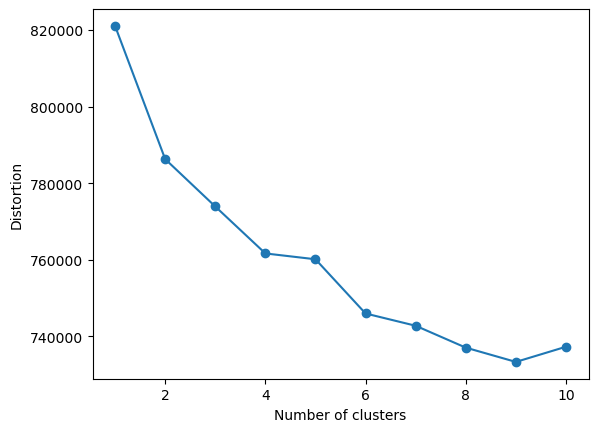

In [61]:
# calculate distortion for a range of number of cluster
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vectors)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Let's try TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Initialise
# Create a Vectorizer Object
vectorizer = TfidfVectorizer()

# Fit
vectorizer.fit(df_sample['Text_clean'])

# Transforming
vectors = vectorizer.transform(df_sample['Text_clean'])

In [77]:
 # I will explain this later
# Initialise
km = KMeans(
    n_clusters=4, init='random',
    n_init=10,random_state=0
)

# Fitting a model
km_model = km.fit(vectors)

# Making predictions
y_km = km.predict(vectors)

pd.DataFrame(y_km).value_counts()

3    3491
0     771
1     738
2      42
Name: count, dtype: int64

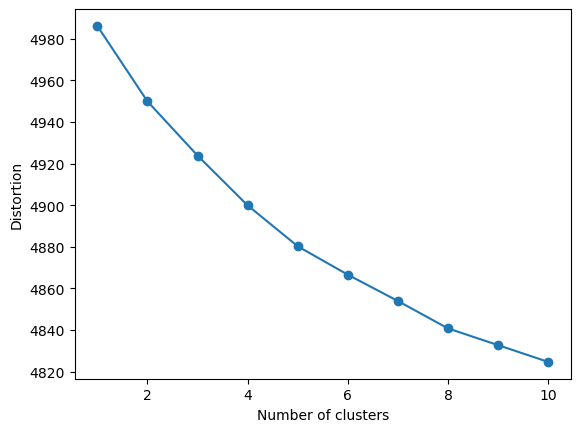

In [78]:
# calculate distortion for a range of number of cluster
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vectors)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### Let's quickly apply PCA on this

In [90]:
# Initialise 
svd = TruncatedSVD(n_components=5)
# Fit a model
svd = svd.fit(vectors)
# Transforming and storing
t_data = svd.transform(vectors)

In [91]:
t_data

array([[ 0.07639515,  0.05237972, -0.00814267, -0.00369026, -0.12035543],
       [ 0.07124848, -0.01695355,  0.00740232, -0.02701452,  0.00497232],
       [ 0.09857481, -0.02844281,  0.00254338, -0.056223  ,  0.016571  ],
       ...,
       [ 0.15121916,  0.25721201,  0.01265923, -0.02379891, -0.19334016],
       [ 0.10990335,  0.2586894 ,  0.00554344,  0.01495364,  0.01913979],
       [ 0.06982483,  0.00167634, -0.0188162 , -0.04090621,  0.00662398]])

### Let's apply Kmeans on it

In [92]:
 # I will explain this later
# Initialise
km = KMeans(
    n_clusters=4, init='random',
    n_init=10,random_state=0
)

# Fitting a model
km_model = km.fit(t_data)

# Making predictions
y_km = km.predict(t_data)

pd.DataFrame(y_km).value_counts()

1    3494
0     882
3     624
2      42
Name: count, dtype: int64

In [ ]:
# 3    3491
# 0     771
# 1     738
# 2      42
# Name: count, dtype: int64

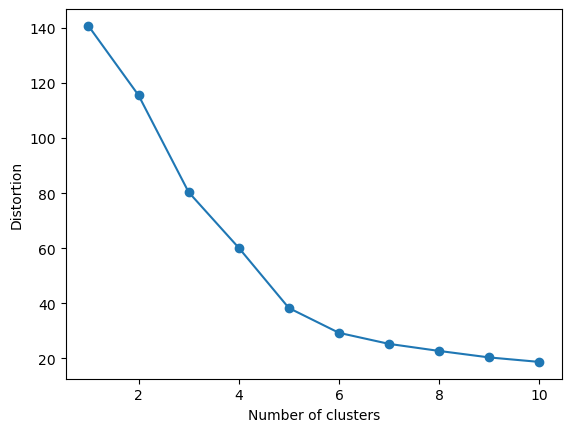

In [93]:
# calculate distortion for a range of number of cluster
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(t_data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [94]:
df_sample

Category                                               Text  \
27750        Books  On Directing Film Amazon.com Review According ...   
9070     Household  Philips Insect Killer Blue Tube UV Pesto Flash...   
42060  Electronics  atoz prime 12mm Black Cutting Plotter With 5pc...   
46044  Electronics  Numex 52mm ND Filter Kit for Nikon D3100/D3200...   
6057     Household  Rida Handloom Pure Silk Carpets Persian Tradit...   
...            ...                                                ...   
10022    Household  Panther Polo Towel Ring H/R Anti-Corrosive and...   
12167    Household  Ginoya Brothers Visible Glass,Juice Glass,Cock...   
29490        Books  302-ENGLISH-ALL-IS-WELL GUIDE PLUS+SAMPLE PAPE...   
22863        Books  Target VITEEE 2019 - Past 13 Years (2018-2006)...   
18218    Household  Taparia 104 Steel (22mm) Cutting Edge Octogona...   

                                              Text_clean  
27750  directing film review according david mamet fi...  
9070   philip insect killer blue tube uv pesto flash ...  
42060  atoz prime black cutting plotter blade degree ...  
46044  numex nd filter kit nikon photography optic ne...  
6057   rida handloom pure silk carpet persian traditi...  
...                                                  ...  
10022  panther polo towel ring stainless steel chrome...  
12167  ginoya brother visible glass juice glass cockt...  
29490  guide paper english contains previous year lat...  
22863  target viteee past year solved paper mock test...  
18218  taparia steel cutting edge octogonal chisel bl...  

[5042 rows x 3 columns]